## Summary 

Author: Trenton Bricken

Used to test how well the exponential upper and lower bounds analytically derived for the circle intersection perform. 

In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
from scipy.sparse import csc_matrix, coo_matrix, csr_matrix
import pandas as pd
from scipy.integrate import quad
import time
from SDM_Circ_Inter_Funcs import *
from Implementations_Associative_Memory import softmax

In [272]:

n=1000
if n==64:
    dv = np.unique(np.linspace(1,n-1, 1000).astype(int).astype(float))
else: 
    dv = np.unique(np.linspace(1,n//2, 1000).astype(int).astype(float)) #n//2
r = 1 # using to get the fraction of the space that is occupied

In [273]:
def normal_approx(dv,n,d,r):
    #norm_const = (2**(n+1)/(np.pi*np.sqrt( dv*(n-dv) )))
    #expo =  np.exp(-(n-2*d)**2 / (2*(n-dv)) )*(r/2**n)
    #return norm_const * expo
    
    mu_a = (n-d-(dv//2)) - ((n-dv)/2)
    std_a = np.sqrt((n-dv)/4)
    mu_b = (dv//2) - (dv/2)
    std_b = np.sqrt((dv)/4)

    a = 2**(n-dv) *1/(np.sqrt(2*np.pi)*std_a) * np.exp(-0.5*(mu_a/std_a)**2)
    b = 2**(dv) * 1/(np.sqrt(2*np.pi)*std_b) * np.exp(-0.5*(mu_b/std_b)**2)
    return a*b * (r /2**n)
    
def taylor_approx(dv,n,d,r):
    
    # need to implement the rounding here too!
    norm_const = (2**(n+1)/(np.pi*np.sqrt( dv*(n-dv) )))
    taylor_exp = np.exp(-(n-(2*d))**2/(2*n) ) * np.exp(- ((n-2*d)**2)/(2*n**2) * dv )
    return norm_const*taylor_exp*(r/2**n)

def taylor_approx_bounds(dv,n,d,r):
    
    # need to implement the rounding here too!
    up_norm_const = (2**(n+1)/(np.pi*np.sqrt( n-1 )))
    low_norm_const = (2**(n+2)/(np.pi*n))
    taylor_exp = np.exp(-(n-(2*d))**2/(2*n) ) * np.exp(- ((n-2*d)**2)/(2*n**2) * dv )
    return low_norm_const*taylor_exp*(r/2**n), up_norm_const*taylor_exp*(r/2**n)

In [274]:
'''from matplotlib.ticker import FormatStrFormatter
from Implementations_Associative_Memory import fit_beta
plt.rcParams.update({'font.size': 11})
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12, 8)
space_frac_rang = [0.0000000000001, 0.00001, 0.001, 0.1]
hamm_distances = space_frac_to_hamm_dist(n, space_frac_rang)
r = 1
for ind, d in enumerate(hamm_distances):
    
    lune = expected_intersection_lune(n, dv, d, r)
    
    beta, bias = fit_beta(n,r,d, return_bias=True)
    
    real_sum = comb(n-dv,n-d-(dv//2))*comb(dv, dv//2) * (r /2**n)
    approx_sum = normal_approx(dv,n,d,r)
    taylor_approx_sum = taylor_approx(dv,n,d,r)
    
    xind = ind//2
    yind = ind%2
    
    axs[xind, yind].plot(dv[:2*d], real_sum[:2*d ], label='First Sum (FS)', alpha=1.0)
    axs[xind, yind].plot(dv[:2*d], lune[:2*d ], label = 'Circle Intersect')
    axs[xind, yind].plot(dv[:2*d], np.exp(beta*hamm_to_cosine(dv, n) + bias)[:2*d ], label="Exp. Beta Fit", alpha=0.5)
    
    #axs[xind, yind].plot(dv[:2*d], approx_sum[:2*d ], label='FS Normal Approx.', alpha=1.0)
    #axs[xind, yind].plot(dv[:2*d], taylor_approx_sum[:2*d ], label='FS Taylor Approx.', alpha=1.0)
    print("MSE is:", ((real_sum-taylor_approx_sum)**2).sum() ,"for d=",d)
    
for ind, ax in enumerate(axs.flat):
    ax.set(xlabel='$d_v$ between two vectors', 
           ylabel='Log $p$ of largest\nsum element',
          title="$d$="+str(hamm_distances[ind])+" | $p$="+str(space_frac_rang[ind]))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
    
for ax in axs.flat:
    #ax.label_outer()
    ax.legend()
    ax.set_yscale('log')
fig.tight_layout()

plt.gcf().savefig('figures/ExponentialLargestSumApproxWCircleInter|N='+str(n)+'.png', dpi=250)
plt.show()'''

'from matplotlib.ticker import FormatStrFormatter\nfrom Implementations_Associative_Memory import fit_beta\nplt.rcParams.update({\'font.size\': 11})\nfig, axs = plt.subplots(2, 2)\nfig.set_size_inches(12, 8)\nspace_frac_rang = [0.0000000000001, 0.00001, 0.001, 0.1]\nhamm_distances = space_frac_to_hamm_dist(n, space_frac_rang)\nr = 1\nfor ind, d in enumerate(hamm_distances):\n    \n    lune = expected_intersection_lune(n, dv, d, r)\n    \n    beta, bias = fit_beta(n,r,d, return_bias=True)\n    \n    real_sum = comb(n-dv,n-d-(dv//2))*comb(dv, dv//2) * (r /2**n)\n    approx_sum = normal_approx(dv,n,d,r)\n    taylor_approx_sum = taylor_approx(dv,n,d,r)\n    \n    xind = ind//2\n    yind = ind%2\n    \n    axs[xind, yind].plot(dv[:2*d], real_sum[:2*d ], label=\'First Sum (FS)\', alpha=1.0)\n    axs[xind, yind].plot(dv[:2*d], lune[:2*d ], label = \'Circle Intersect\')\n    axs[xind, yind].plot(dv[:2*d], np.exp(beta*hamm_to_cosine(dv, n) + bias)[:2*d ], label="Exp. Beta Fit", alpha=0.5)\n    

Beta Fit MSE: 2.0243028867445985e+19
MSE is: 1.017238349052832e-27 for d= 384
Beta Fit MSE: 6.725115118626376e+19
beta that has been fit 24.619424184698712
Beta Fit MSE: 8685276406.930567
MSE is: 2.9955153732342544e-16 for d= 418
Beta Fit MSE: 25103297185.12687
beta that has been fit 13.51864202206865
Beta Fit MSE: 245477.4113648198
MSE is: 1.0387379928011566e-10 for d= 441
Beta Fit MSE: 562707.7875198515
beta that has been fit 7.918296950716469
Beta Fit MSE: 684.4987332542693
MSE is: 4.520933107459771e-07 for d= 463
Beta Fit MSE: 742.7481028582675
beta that has been fit 4.01213466872095


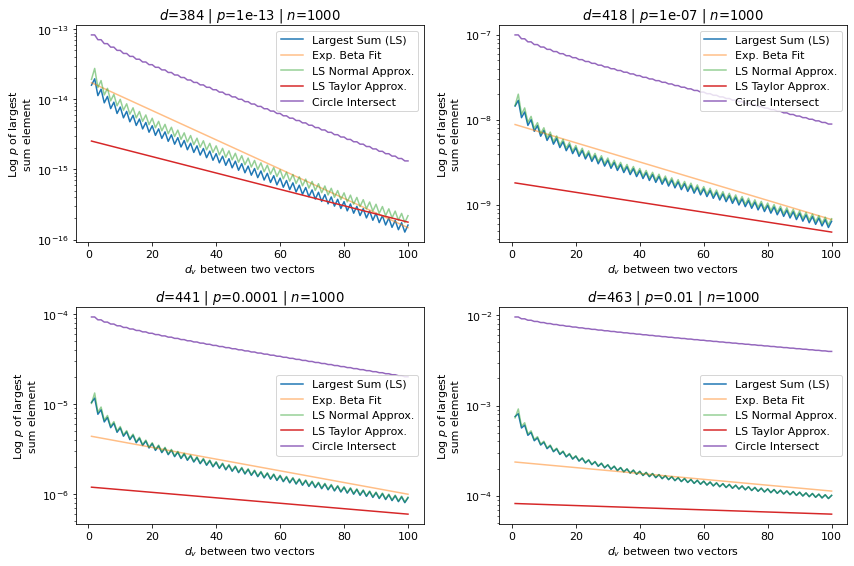

In [275]:
from matplotlib.ticker import FormatStrFormatter
from Implementations_Associative_Memory import fit_beta
plt.rcParams.update({'font.size': 11})
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12, 8)
space_frac_rang = [0.0000000000001, 0.0000001, 0.0001, 0.01]
hamm_distances = space_frac_to_hamm_dist(n, space_frac_rang)
r = 1
d_frac = int(n*0.1)
for ind, d in enumerate(hamm_distances):
    
    lune = expected_intersection_lune(n, dv, d, r)
    real_sum = comb(n-dv,n-d-(dv//2))*comb(dv, dv//2) * (r /2**n)
    approx_sum = normal_approx(dv,n,d,r)
    taylor_approx_sum = taylor_approx(dv,n,d,r)
    
    ta_sum_lower, ta_sum_upper = taylor_approx_bounds(dv,n,d,r) # bounds on the taylor approximation
    
    beta, bias = fit_beta_regression(n,dv[:d], real_sum[:d], return_bias=True)
    
    xind = ind//2
    yind = ind%2

    axs[xind, yind].plot(dv[:d_frac], real_sum[:d_frac], label='Largest Sum (LS)', alpha=1.0)
    axs[xind, yind].plot(dv[:d_frac], np.exp(beta*hamm_to_cosine(dv, n) + bias)[:d_frac], label="Exp. Beta Fit", alpha=0.5)
    axs[xind, yind].plot(dv[:d_frac], approx_sum[:d_frac], label='LS Normal Approx.', alpha=0.5)
    #axs[xind, yind].plot(dv[:d_frac], taylor_approx_sum[:d_frac], label='LS Taylor Approx.', alpha=1.0)
    axs[xind, yind].plot(dv[:d_frac], ta_sum_lower[:d_frac], label='LS Taylor Approx.', alpha=1.0)
    #axs[xind, yind].plot(dv[:d_frac], ta_sum_upper[:d_frac], label='Up LS Taylor Approx.', alpha=1.0)
    
    print("MSE is:", ((real_sum-taylor_approx_sum)**2).sum() ,"for d=",d)
    
    lune = expected_intersection_lune(n, dv, d, r)
    beta, bias = fit_beta(n,r,d, return_bias=True)
    axs[xind, yind].plot(dv[:d_frac], lune[:d_frac], label = 'Circle Intersect')
    
for ind, ax in enumerate(axs.flat):
    ax.set(xlabel='$d_v$ between two vectors', 
           ylabel='Log $p$ of largest\nsum element',
          title="$d$="+str(hamm_distances[ind])+" | $p$="+str(space_frac_rang[ind])+" | $n$="+str(n))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
    
for ax in axs.flat:
    #ax.label_outer()
    ax.legend()
    ax.set_yscale('log')
fig.tight_layout()

plt.gcf().savefig('figures/ExponentialLargestSumApprox|N='+str(n)+'.png', dpi=250)
plt.show()

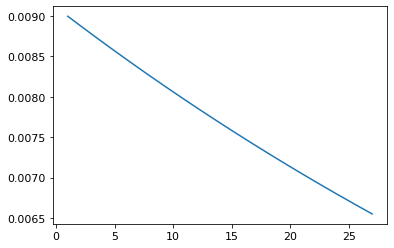

In [258]:
plt.plot(dv[:d], ta_sum_lower[:d ], label='LS Taylor Approx.', alpha=1.0)

## Showing quality of the upper and lower bounds on the full circle intersection

In [207]:
d = 11
n=64#64
dv = np.unique(np.linspace(1,n//2, 1000).astype(int))
r = 1 # using to get the fraction of the space that is occupied

/home/trenton/SDM/SDM_Circ_Inter_Funcs.py:231: RuntimeWarning: divide by zero encountered in log
  expected_intersect = np.log(intersect)+np.log(perc_addresses_w_neurons)


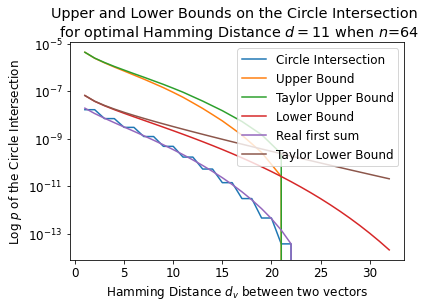

In [208]:
plt.rcParams.update({'font.size': 12})
lune = expected_intersection_lune(n, dv, d, r)
plt.plot(dv, lune, label = 'Circle Intersection')
hide_UBs = False

real_sum = comb(n-dv,n-d-(dv/2))*comb(dv, dv/2) * (r /2**n)
norm_const = (2**n/(1/2*np.pi*np.sqrt( dv*(n-dv) )))
expo =  np.exp(-(n-2*d)**2 / (2*(n-dv)) )*(r/2**n)
approx_sum = norm_const * expo
taylor_exp = np.exp(-(n-(2*d))**2/(2*n) ) * np.exp(- ((n-(2*d))**2)/(2*n) * (dv/n) )*(r/2**n)
taylor_approx_sum = norm_const*taylor_exp

num_sum_elements = []
for dv_temp in dv:
    temp_sum = 0
    a_vals = np.arange(n-d-dv_temp//2, n-dv_temp+0.1)
    for aval in a_vals: 
        temp_sum += (dv_temp-(n-d-aval)) - ( np.maximum(0, n-d-aval) )
    num_sum_elements.append(temp_sum)
num_sum_elements = np.asarray(num_sum_elements)
#print(num_sum_elements)
#print(num_sum_elements)
#UB assuming its everywhere: 
#if not hide_UBs:
#    plt.plot(dv, real_sum*num_sum_elements, label='binom, UB', alpha=0.5)

# LB assuming it is just this sum
#plt.plot(dv, real_sum, label='binom, LB', alpha=0.5)

# expo approximations: 

if not hide_UBs:
    plt.plot(dv,  approx_sum*num_sum_elements, label='Upper Bound', alpha=1.0)
    plt.plot(dv,  taylor_approx_sum*num_sum_elements, label='Taylor Upper Bound', alpha=1.0)
plt.plot(dv, approx_sum, label='Lower Bound', alpha=1.0)
plt.plot(dv, real_sum, label='Real first sum', alpha=1.0)

plt.plot(dv, taylor_approx_sum, label='Taylor Lower Bound', alpha=1.0)
plt.title("Upper and Lower Bounds on the Circle Intersection \n for optimal Hamming Distance $d=$"+str(d)+" when $n$="+str(n))

plt.xlabel('Hamming Distance $d_v$ between two vectors')
plt.ylabel('Log $p$ of the Circle Intersection')
plt.yscale('log')
plt.legend()
plt.gcf().savefig('figures/UBandLB_ExponentialApprox|N='+str(n)+'|d='+str(d)+'.png', dpi=250)
plt.show()




In [206]:
num_sum_elements

array([15., 14., 13., 11.,  9.,  6.,  4.,  2.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

## Plotting relationship between Hamming distance $d$ and Beta values in the exponent

/Users/trentonbricken/SDM/SDM_Circ_Inter_Funcs.py:124: RuntimeWarning: divide by zero encountered in log
  res =np.asarray(res)


[1.274786e+06 1.274786e+06 2.310760e+05 2.310760e+05 3.602200e+04
 3.602200e+04 4.102000e+03 4.102000e+03 2.520000e+02 2.520000e+02
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
MSE: 3358246186730.816
[0.6714892  0.22238801 0.07365185 0.02439248 0.00807846]
[1.25776486e+09 1.25776486e+09 3.85223304e+08 3.85223304e+08
 1.14878460e+

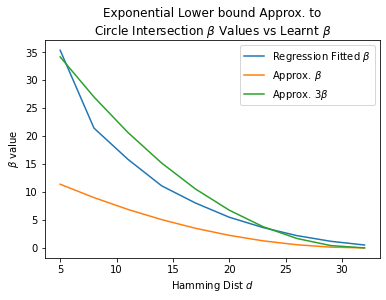

In [7]:
n=64
d = np.linspace(5,n//2, 10).astype(int)
#space_frac_rang = [0.00000001, 0.00001, 0.001, 0.1]
dv = np.linspace(1,n, 1000).astype(int)
dv = np.unique(dv)
r = 2**n#1000000
#beta_d = -(n-2*d)**2 / 2
beta_cs = (n-2*d)**2 / (4*n)

#plt.plot(d, beta_d)
#plt.show()
learned_betas = []
fit_to_curve = True
normalize = False
for hamm_dist in d: 
    res = expected_intersection_interpretable(n, dv, hamm_dist, r) 
    res = np.nan_to_num(res,nan=0.0)
    print(res)
    if fit_to_curve:
        # want to fit the regression to the circle intersection part
        # not to the whole circle intersect function
        chop_ind = int( (hamm_dist)//(n/len(dv)) )
        chopped_dvs = dv[:chop_ind]
        chopped_res = res[:chop_ind]
        fit_beta_res, beta = fit_beta_regression(n, chopped_dvs, chopped_res )
        xvals = 1-(2*dv)/n
        print(fit_beta_res)
    else: 
        fit_beta_res, beta = fit_beta_regression(n, dv, res )
    
    learned_betas.append(beta)
    
plt.plot(d, learned_betas, label=r"Regression Fitted $\beta$")
plt.plot(d, beta_cs, label=r'Approx. $\beta$') # when CS = 0. See next plot
plt.plot(d, 3*beta_cs, label=r'Approx. $3\beta$')
#plt.plot(d, beta_cs*0.1, label=r'Approx. Min $\beta$') # when CS = 1
#plt.plot(d, -beta_cs*4+3, label='rescale')
plt.xlabel("Hamming Dist $d$")
plt.ylabel(r"$\beta$ value")
plt.legend()
plt.title(r"Exponential Lower bound Approx. to"+ "\n" +r"Circle Intersection $\beta$ Values vs Learnt $\beta$")
plt.gcf().savefig('figures/BetaValues_ExponentialApprox_n='+str(n)+'.png', dpi=250)
plt.show()

Text(0.5, 1.0, 'Input to exponential')

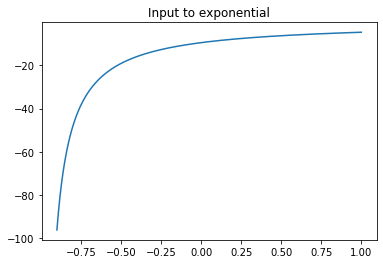

In [126]:
cs = np.linspace(-0.9,1,1000)
d = 451
n=1000
beta_cs = -(n-2*d)**2 / n
plt.plot(cs, beta_cs* 1/(1+cs) )
plt.title("Input to exponential")

## Relationship between cosine similarity input and 1/1+C

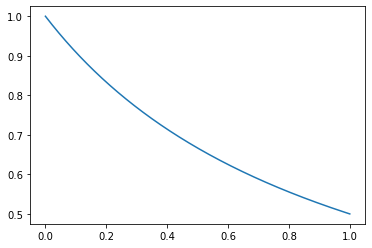

In [65]:
cs = np.linspace(0,1,1000)
plt.plot(cs, 1/(1+cs))

In [68]:
#plt.plot(dv, 1/(n-dv))

## Plotting each of the components of the exponential approximation

In [34]:
d = 451#11
n=1000#64
dv = np.unique(np.linspace(1,n//2, 1000).astype(int))
r = 2**n # using to get the fraction of the space that is occupied

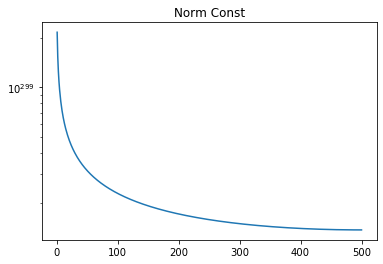

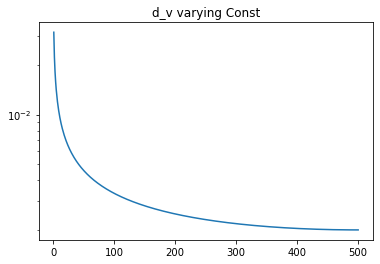

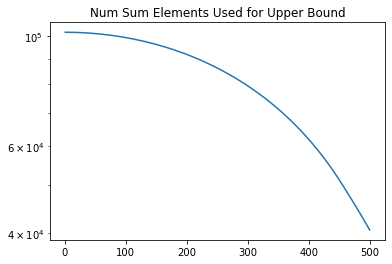

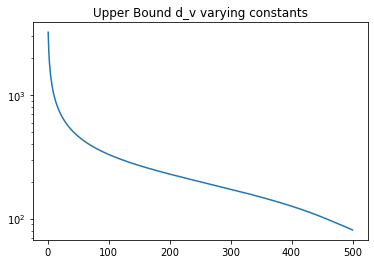

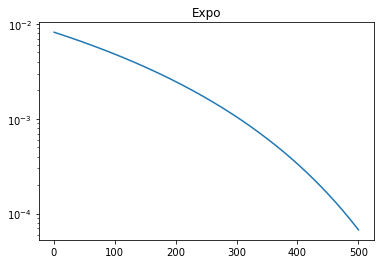

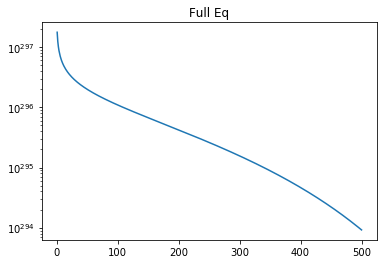

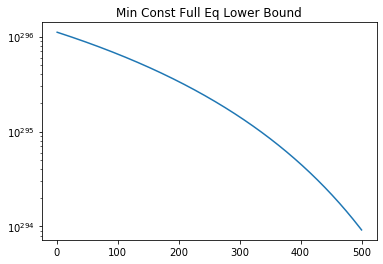

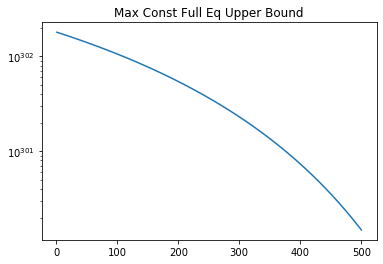

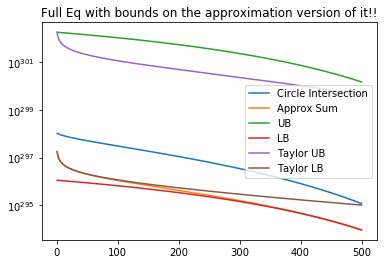

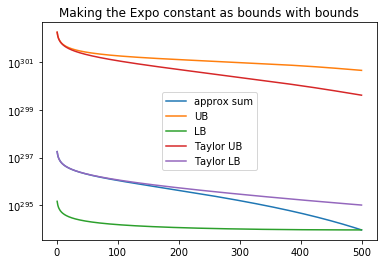

spans for num sum, norm const, expo 2.5103689473424953 15.819299929208317 121.16983944376892


In [35]:
approx_sum = (2**n/(1/2*np.pi*np.sqrt( dv*(n-dv) ))) * np.exp(-(n-2*d)**2 / (2*(n-dv)) )
norm_const = (2**n/(1/2*np.pi*np.sqrt( dv*(n-dv) )))
min_const = np.min(norm_const)
expo = np.exp(-(n-2*d)**2 / (2*(n-dv)) )
taylor_exp = np.exp(-(n-2*d)**2/(2*n) ) * np.exp(- ((n-2*d)**2)/(2*n) * (dv/n) )
dv_varying_constant = 1/np.sqrt( dv*(n-dv) )

use_log = True

num_sum_elements = []
for dv_temp in dv:
    temp_sum = 0
    a_vals = np.arange(n-d-dv_temp//2, n-dv_temp+0.1)
    for aval in a_vals: 
        temp_sum += (dv_temp-(n-d-aval)) - ( np.maximum(0, n-d-aval) )
    num_sum_elements.append(temp_sum)
num_sum_elements = np.asarray(num_sum_elements)

plt.plot(dv, norm_const )
plt.title("Norm Const")
if use_log:
    plt.yscale('log')
plt.show()

plt.plot(dv, dv_varying_constant )
plt.title("d_v varying Const")
if use_log:
    plt.yscale('log')
plt.show()

plt.plot(dv, num_sum_elements )
plt.title("Num Sum Elements Used for Upper Bound")
if use_log:
    plt.yscale('log')
plt.show()

plt.plot(dv, dv_varying_constant*num_sum_elements )
plt.title("Upper Bound d_v varying constants")
if use_log:
    plt.yscale('log')
plt.show()

plt.plot(dv, expo )
plt.title("Expo")
if use_log:
    plt.yscale('log')
plt.show()

plt.plot(dv, approx_sum )
plt.title("Full Eq")
if use_log:
    plt.yscale('log')
plt.show()

# ================= using constants: 

plt.plot(dv, np.min(norm_const)*expo )
plt.title("Min Const Full Eq Lower Bound")
if use_log:
    plt.yscale('log')
plt.show()
#print('number of sum elements', num_sum_elements)
plt.plot(dv, np.max(num_sum_elements)* np.max(norm_const)*expo )
plt.title("Max Const Full Eq Upper Bound")
if use_log:
    plt.yscale('log')
plt.show()


lune = expected_intersection_lune(n, dv, d, r)
plt.plot(dv, lune, label = 'Circle Intersection')
plt.plot(dv, approx_sum, label ='Approx Sum' )
plt.plot(dv, np.max(num_sum_elements)* np.max(norm_const)*expo , label='UB')
plt.plot(dv, np.min(norm_const)*expo , label = "LB")
plt.plot(dv, num_sum_elements* norm_const*taylor_exp , label = "Taylor UB")
plt.plot(dv, norm_const*taylor_exp , label = "Taylor LB")
plt.title("Full Eq with bounds on the approximation version of it!!")
if use_log:
    plt.yscale('log')
plt.legend()
plt.show()


plt.plot(dv, approx_sum, label="approx sum" )
plt.plot(dv, num_sum_elements* norm_const*np.max(expo) , label='UB')
plt.plot(dv, norm_const*np.min(expo) , label = "LB")
plt.plot(dv, num_sum_elements* norm_const*taylor_exp , label = "Taylor UB")
plt.plot(dv, norm_const*taylor_exp , label = "Taylor LB")
plt.title("Making the Expo constant as bounds with bounds")
if use_log:
    plt.yscale('log')
plt.legend()
plt.show()

print('spans for num sum, norm const, expo', np.max(num_sum_elements)/np.min(num_sum_elements),
     np.max(norm_const)/np.min(norm_const), 
     np.max(expo)/np.min(expo))


In [10]:
np.exp(-(n-2*d)**2 ) #* np.exp(- ((n-2*d)**2)/2 * (dv/n) )


0.0

In [11]:
(n-2*d)

98

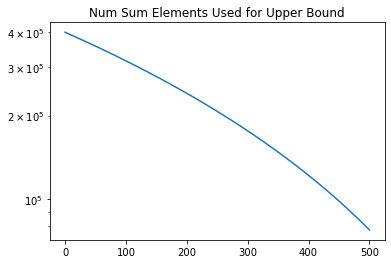

0

In [177]:
dv = np.linspace(0,n//2, 1000)
num_a_vals = (n-dv) - (n-d-dv/2)
num_c_vals = (dv - (n-d- (n-dv) ) ) - (n-d-(n-dv))
num_sum_elements = num_a_vals*num_c_vals

plt.plot(dv, num_sum_elements )
plt.title("Num Sum Elements Used for Upper Bound")
if use_log:
    plt.yscale('log')
plt.show()
np.argmax(num_sum_elements)

## Showing quality of the upper and lower bounds on the full circle intersection where I fix the constants

In [74]:
d = 405#11
n=1000#64
dv = np.unique(np.linspace(1,800, 1000).astype(int))
r = 1 # using to get the fraction of the space that is occupied

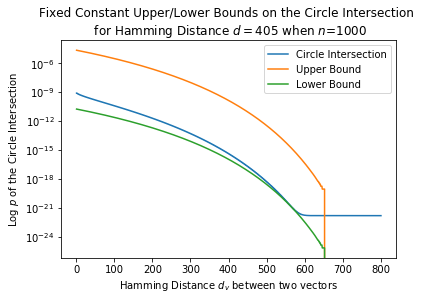

In [75]:
lune = expected_intersection_lune(n, dv, d, r)
plt.plot(dv, lune, label = 'Circle Intersection')
hide_UBs = False

real_sum = comb(n-dv,n-d-(dv/2))*comb(dv, dv/2) * (r /2**n)
approx_sum_constant = (2**n/(1/2*np.pi*np.sqrt( dv*(n-dv) ))) 
approx_sum_expo = np.exp(-(n-2*d)**2 / (2*(n-dv)) )*(r/2**n)
#approx_sum_expo = np.exp(-(n-2*d)**2/(2*n) ) * np.exp(- ((n-2*d)**2)/(2*n) * (dv/n) )*(r/2**n)

num_sum_elements = []
for dv_temp in dv:
    temp_sum = 0
    a_vals = np.arange(n-d-dv_temp//2, n-dv_temp+0.1)
    for aval in a_vals: 
        temp_sum += (dv_temp-(n-d-aval)) - ( np.maximum(0, n-d-aval) )
    num_sum_elements.append(temp_sum)
num_sum_elements = np.asarray(num_sum_elements)
#print(num_sum_elements)
#print(num_sum_elements)
#UB assuming its everywhere: 
#if not hide_UBs:
#    plt.plot(dv, real_sum*num_sum_elements, label='binom, UB', alpha=0.5)

# LB assuming it is just this sum
#plt.plot(dv, real_sum, label='binom, LB', alpha=0.5)

# expo approximations: 

if not hide_UBs:
    plt.plot(dv, np.max(num_sum_elements)*np.max(approx_sum_constant)*approx_sum_expo, 
             label='Upper Bound', alpha=1.0)
plt.plot(dv, np.min(approx_sum_constant)*approx_sum_expo, 
         label='Lower Bound', alpha=1.0)
plt.title("Fixed Constant Upper/Lower Bounds on the Circle Intersection \n for Hamming Distance $d=$"+str(d)+" when $n$="+str(n))

plt.xlabel('Hamming Distance $d_v$ between two vectors')
plt.ylabel('Log $p$ of the Circle Intersection')
plt.yscale('log')
plt.legend()
#plt.gcf().savefig('figures/FixedConstants_UBandLB_ExponentialApproxD='+str(d)+'.png', dpi=250)
plt.show()


